### Librerías

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
import cv2
import imutils
from sklearn.model_selection import train_test_split

### Constantes

In [2]:
IMG_SIZE = (224,224)

PATH = "./imagenes/"

#Encoding para despues
CLASS_NAME = {'Angelfish':0, 'Bedotia_geayi':1, 'Betta':2,
                   'cebra':3, 'Globo2':4, 'Goldfish2':5,
                   'Gourami2':6, 'Guppy':7, 'Hypostomus_plecostomus':8,
                  'molly':9, 'platys':10, 'Ramizeri':11,
                  'Symphysodon':12, 'Killis':13, 'Arcoiris':14}

### Función para renombrar imágenes para crear el df

In [3]:
def renombrado(path, guardado):
    directorios = ['Angelfish', 'Bedotia_geayi', 'Betta',
                   'cebra', 'Globo2', 'Goldfish2',
                   'Gourami2', 'Guppy', 'Hypostomus_plecostomus',
                  'molly', 'platys', 'Ramizeri',
                  'Symphysodon', 'Killis', 'Arcoiris']
    
    for directorio in directorios:
        i = 0
        path_aux = (path + directorio)
        for imagen in os.listdir(path_aux):
            img = cv2.imread(path_aux +'/'+ imagen)
            # small_img = cv2.resize(img, (224, 224))
            imagen_nom = guardado + directorio + '.' + str(i)  + '_normalizada.jpg'
            cv2.imwrite(imagen_nom, img)
            i += 1
        

In [4]:
try:
    os.mkdir("Imagenes normalizadas")
except FileExistsError: 
    pass

In [5]:
guardado = "./Imagenes normalizadas/"

In [6]:
renombrado(PATH, guardado)

### Creación de dataframe

In [7]:
# Listamos todos los archivos de la carpeta de guardado(donde están todas las imágenes normalizadas)
filenames = os.listdir(guardado)
filenames.remove('.ipynb_checkpoints')
print('todos',len(filenames))
# filenames.remove('.DS_Store')
print('sin ocultos',len(filenames))

#Creamos una lsita vacía para nuestro encoding
fish = []

# Iteramosterar sobre los archivos
for filename in filenames:
    if filename[0] != ".": # No es un directorio:
        category = filename.split('.')[0]
        fish.append(CLASS_NAME[category])

fish_df = pd.DataFrame({
    'Filename': filenames,
    'Target': fish

})

fish_df.head()

todos 602
sin ocultos 602


,Filename,Target
0,Angelfish.0_normalizada.jpg,0
1,Angelfish.10_normalizada.jpg,0
2,Angelfish.11_normalizada.jpg,0
3,Angelfish.12_normalizada.jpg,0
4,Angelfish.13_normalizada.jpg,0


In [8]:
filenames_list = list(fish_df['Filename'])

target_list = list(fish_df['Target'])

### Preparar Split de test y train y resize imagen

In [9]:
X = []
y = []
for file in filenames_list:
        
    img = imread(guardado + file)
    image_resized = cv2.resize(img, IMG_SIZE)
    X.append(image_resized)
    
X = np.array(X)
y = np.array(target_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(541, 224, 224, 3)
(541,)
(61, 224, 224, 3)
(61,)


In [10]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [11]:
X_train = X_train / 255.0
X_test = X_test /255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))
print("Min:", np.min(X_test))
print("Max:", np.max(X_test))

Min: 0.0
Max: 1.0
Min: 0.0
Max: 1.0


In [56]:
train_df, validate_df = train_test_split(fish_df,
                                         test_size=0.20,
                                         random_state=42)

In [57]:
train_df

,Filename,Target
9,Angelfish.18_normalizada.jpg,0
375,Hypostomus_plecostomus.19_normalizada.jpg,8
524,Ramizeri.22_normalizada.jpg,11
188,cebra.3_normalizada.jpg,3
131,Betta.32_normalizada.jpg,2
...,...,...
71,Arcoiris.35_normalizada.jpg,14
106,Betta.0_normalizada.jpg,2
270,Goldfish2.4_normalizada.jpg,5
435,molly.23_normalizada.jpg,9


In [72]:
try: 
    os.mkdir("train_images")
    os.mkdir("test_images")
except FileExistsError: 
    pass

In [73]:
import shutil

In [14]:
try: 
    os.mkdir("train_images_2")
    os.mkdir("test_images_2")
except FileExistsError: 
    pass

In [21]:

i = 0
for x,y in zip(X_train, y_train): 
    filename = f"train_images_2/{INV_CLASSES[y]}.{i}.jpg"
    # print(filename)
    cv2.imwrite(filename, x)
    i += 1

train_images_2/cebra.0.jpg
train_images_2/Guppy.1.jpg
train_images_2/Ramizeri.2.jpg
train_images_2/platys.3.jpg
train_images_2/Arcoiris.4.jpg
train_images_2/Symphysodon.5.jpg
train_images_2/Symphysodon.6.jpg
train_images_2/Bedotia_geayi.7.jpg
train_images_2/Guppy.8.jpg
train_images_2/Gourami2.9.jpg
train_images_2/Angelfish.10.jpg
train_images_2/molly.11.jpg
train_images_2/Hypostomus_plecostomus.12.jpg
train_images_2/molly.13.jpg
train_images_2/Ramizeri.14.jpg
train_images_2/Gourami2.15.jpg
train_images_2/Globo2.16.jpg
train_images_2/Symphysodon.17.jpg
train_images_2/molly.18.jpg
train_images_2/Gourami2.19.jpg
train_images_2/molly.20.jpg
train_images_2/Symphysodon.21.jpg
train_images_2/Guppy.22.jpg
train_images_2/Arcoiris.23.jpg
train_images_2/Angelfish.24.jpg
train_images_2/cebra.25.jpg
train_images_2/Globo2.26.jpg
train_images_2/Hypostomus_plecostomus.27.jpg
train_images_2/Globo2.28.jpg
train_images_2/Globo2.29.jpg
train_images_2/Ramizeri.30.jpg
train_images_2/Arcoiris.31.jpg
train_im

In [22]:
i = 0
for x,y in zip(X_test, y_test): 
    filename = f"test_images_2/{INV_CLASSES[y]}.{i}.jpg"
    # print(filename)
    cv2.imwrite(filename, x)
    i += 1

## Machine learning model

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import layers
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
import numpy as np
import cv2
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [64]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_PATH = "./train_images"
TEST_PATH = "./test_images"
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [45]:
INV_CLASSES = {v: k for k, v in CLASS_NAME.items()}

In [58]:
# train_df['Target'] =train_df['Target'].map(INV_CLASSES)
train_df

<ipython-input-58-db755aed1c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Target'] =train_df['Target'].map(INV_CLASSES)


,Filename,Target
9,Angelfish.18_normalizada.jpg,Angelfish
375,Hypostomus_plecostomus.19_normalizada.jpg,Hypostomus_plecostomus
524,Ramizeri.22_normalizada.jpg,Ramizeri
188,cebra.3_normalizada.jpg,cebra
131,Betta.32_normalizada.jpg,Betta
...,...,...
71,Arcoiris.35_normalizada.jpg,Arcoiris
106,Betta.0_normalizada.jpg,Betta
270,Goldfish2.4_normalizada.jpg,Goldfish2
435,molly.23_normalizada.jpg,molly


In [65]:
# validate_df['Target'] = validate_df['Target'].map(INV_CLASSES)
validate_df

,Filename,Target
110,Betta.13_normalizada.jpg,Betta
419,Killis.9_normalizada.jpg,Killis
567,Symphysodon.23_normalizada.jpg,Symphysodon
77,Arcoiris.7_normalizada.jpg,Arcoiris
181,cebra.33_normalizada.jpg,cebra
...,...,...
340,Guppy.32_normalizada.jpg,Guppy
148,Betta.48_normalizada.jpg,Betta
495,platys.40_normalizada.jpg,platys
439,molly.27_normalizada.jpg,molly


In [66]:
train_df

,Filename,Target
9,Angelfish.18_normalizada.jpg,Angelfish
375,Hypostomus_plecostomus.19_normalizada.jpg,Hypostomus_plecostomus
524,Ramizeri.22_normalizada.jpg,Ramizeri
188,cebra.3_normalizada.jpg,cebra
131,Betta.32_normalizada.jpg,Betta
...,...,...
71,Arcoiris.35_normalizada.jpg,Arcoiris
106,Betta.0_normalizada.jpg,Betta
270,Goldfish2.4_normalizada.jpg,Goldfish2
435,molly.23_normalizada.jpg,molly


In [79]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    TRAIN_PATH,
                                                    x_col='Filename',
                                                    y_col='Target',
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = IMG_SIZE)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              TEST_PATH,
                                                              x_col='Filename',
                                                              y_col='Target',
                                                              batch_size = 20,
                                                              class_mode = 'categorical',
                                                              target_size = IMG_SIZE)

Found 481 validated image filenames belonging to 15 classes.
Found 121 validated image filenames belonging to 15 classes.


## Resnet

In [85]:
base_model = ResNet50V2(input_shape = (224, 224, 3), 
                       include_top = False, 
                       weights = 'imagenet', 
                       # classifier_activation = 'softmax'
                         )
# conv1 = layers.Conv2D(28, (3,3), strides=(2,2), activation = None, kernel_regularizer=l2(0.))(resnet_model.outputs)
# model = Model(inputs=resnet_model.input, outputs=conv1)
x = layers.Flatten()(resnet_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(15, activation='softmax')(x)

model_resnet = tf.keras.models.Model(resnet_model.input, x)

model_resnet.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [86]:
model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 10)

Epoch 1/10
25/25 [==============================] - 10s 264ms/step - loss: 4.8131 - acc: 0.1393 - val_loss: 21.5094 - val_acc: 0.0248
Epoch 2/10
25/25 [==============================] - 6s 240ms/step - loss: 3.1038 - acc: 0.1372 - val_loss: 131.2886 - val_acc: 0.0496
Epoch 3/10
25/25 [==============================] - 6s 239ms/step - loss: 2.7274 - acc: 0.1913 - val_loss: 95.5566 - val_acc: 0.1322
Epoch 4/10
25/25 [==============================] - 6s 244ms/step - loss: 2.7355 - acc: 0.1830 - val_loss: 2705.9258 - val_acc: 0.0992
Epoch 5/10
25/25 [==============================] - 6s 249ms/step - loss: 3.0481 - acc: 0.1871 - val_loss: 2096.3213 - val_acc: 0.0826
Epoch 6/10
25/25 [==============================] - 6s 253ms/step - loss: 2.8863 - acc: 0.2037 - val_loss: 19.1254 - val_acc: 0.0992
Epoch 7/10
25/25 [==============================] - 6s 250ms/step - loss: 2.8365 - acc: 0.1663 - val_loss: 4.3570 - val_acc: 0.1322
Epoch 8/10
25/25 [==============================] - 6s 250ms/ste

In [87]:
preds_resnet = model.predict(X_test)

In [149]:
validate_df.reset_index(inplace = True, drop = True)
validate_df

,Filename,Target
0,Betta.13_normalizada.jpg,Betta
1,Killis.9_normalizada.jpg,Killis
2,Symphysodon.23_normalizada.jpg,Symphysodon
3,Arcoiris.7_normalizada.jpg,Arcoiris
4,cebra.33_normalizada.jpg,cebra
...,...,...
116,Guppy.32_normalizada.jpg,Guppy
117,Betta.48_normalizada.jpg,Betta
118,platys.40_normalizada.jpg,platys
119,molly.27_normalizada.jpg,molly


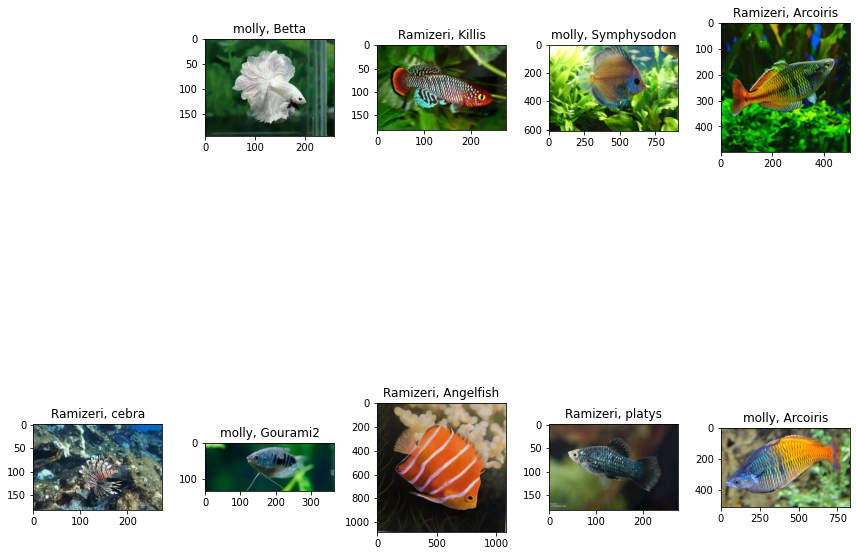

In [159]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_resnet[i] == preds_resnet[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {filename.split('.')[0]}")
    
plt.tight_layout()
plt.savefig('prediccion')
plt.show()

## InceptionV3

In [160]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

IM_SIZE = 224

base_model = InceptionV3(input_shape = (IM_SIZE, IM_SIZE, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in base_model.layers: 
    layer.trainable = False
    
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(15, activation = 'softmax')(x)


model_inception = tf.keras.models.Model(base_model.input, x)

model_inception.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [166]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=10, min_delta = 0.0001, restore_best_weights = True)

In [167]:
model_inception.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 20, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
25/25 [==============================] - 5s 213ms/step - loss: 0.9765 - accuracy: 0.5052 - val_loss: 0.9894 - val_accuracy: 0.3554
Epoch 2/50
25/25 [==============================] - 5s 214ms/step - loss: 0.6517 - accuracy: 0.5385 - val_loss: 0.5226 - val_accuracy: 0.5620
Epoch 3/50
25/25 [==============================] - 5s 214ms/step - loss: 0.4664 - accuracy: 0.5967 - val_loss: 0.5892 - val_accuracy: 0.4959
Epoch 4/50
25/25 [==============================] - 5s 216ms/step - loss: 0.4043 - accuracy: 0.6133 - val_loss: 0.2551 - val_accuracy: 0.6116
Epoch 5/50
25/25 [==============================] - 5s 211ms/step - loss: 0.2947 - accuracy: 0.6341 - val_loss: 0.3119 - val_accuracy: 0.4959
Epoch 6/50
25/25 [==============================] - 6s 217ms/step - loss: 0.2588 - accuracy: 0.6590 - val_loss: 0.3343 - val_accuracy: 0.5537
Epoch 7/50
25/25 [==============================] - 5s 216ms/step - loss: 0.2579 - accuracy: 0.6757 - val_loss: 0.3607 - val_accuracy: 0.5124
Epoch 

In [168]:
preds_inception = model.predict(X_test)

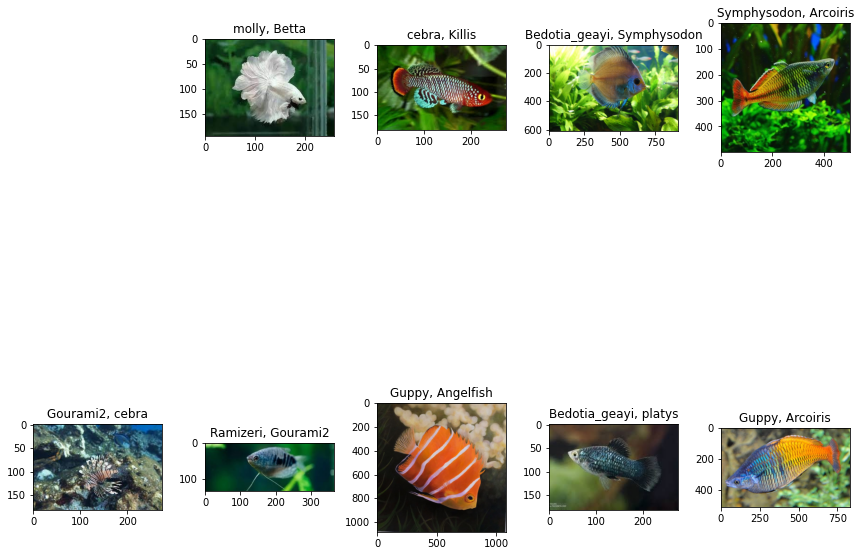

In [170]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_inception[i] == preds_inception[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {filename.split('.')[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_inception')
plt.show()

## VGG 16

In [171]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (IM_SIZE, IM_SIZE, 3), 
                  include_top = False, 
                  weights = 'imagenet')


for layer in base_model.layers: 
    layer.trainable = False
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(15, activation='softmax')(x)

cgg16_model = tf.keras.models.Model(base_model.input, x)

vgg16_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [172]:
vgg16_model.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 20, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
25/25 [==============================] - 10s 255ms/step - loss: 6.3280 - acc: 0.1164 - val_loss: 2.3983 - val_acc: 0.2149
Epoch 2/50
25/25 [==============================] - 6s 241ms/step - loss: 2.4501 - acc: 0.2370 - val_loss: 2.1121 - val_acc: 0.3388
Epoch 3/50
25/25 [==============================] - 6s 234ms/step - loss: 2.2858 - acc: 0.2661 - val_loss: 2.0617 - val_acc: 0.3140
Epoch 4/50
25/25 [==============================] - 6s 232ms/step - loss: 2.1331 - acc: 0.2765 - val_loss: 1.9730 - val_acc: 0.3140
Epoch 5/50
25/25 [==============================] - 6s 235ms/step - loss: 2.0860 - acc: 0.3181 - val_loss: 1.8507 - val_acc: 0.3802
Epoch 6/50
25/25 [==============================] - 6s 237ms/step - loss: 1.9694 - acc: 0.3347 - val_loss: 1.7796 - val_acc: 0.5289
Epoch 7/50
25/25 [==============================] - 6s 240ms/step - loss: 1.9709 - acc: 0.3617 - val_loss: 1.6329 - val_acc: 0.5702
Epoch 8/50
25/25 [==============================] - 6s 246ms/step - loss: 1

In [173]:
preds_vgg16 = model_vgg16.predict(X_test)

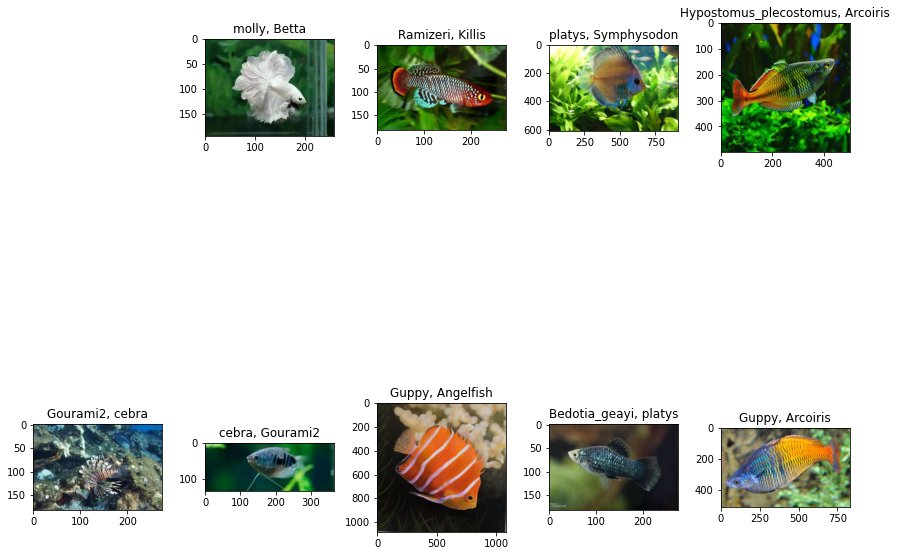

In [174]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_vgg16[i] == preds_vgg16[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {filename.split('.')[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_vgg16')
plt.show()

## VGG19

In [208]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (IM_SIZE, IM_SIZE, 3), 
                  include_top = False, 
                  weights = 'imagenet')


for layer in base_model.layers: 
    layer.trainable = False
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)

# Add a final sigmoid layer for classification
x = layers.Dense(15, activation='softmax')(x)

vgg19_model = tf.keras.models.Model(base_model.input, x)

vgg19_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [ ]:
vgg19_model.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 256, 
         epochs = 50, 
         callbacks = [earlystop])

In [ ]:
preds_vgg19 = vgg19_model.predict(X_test)

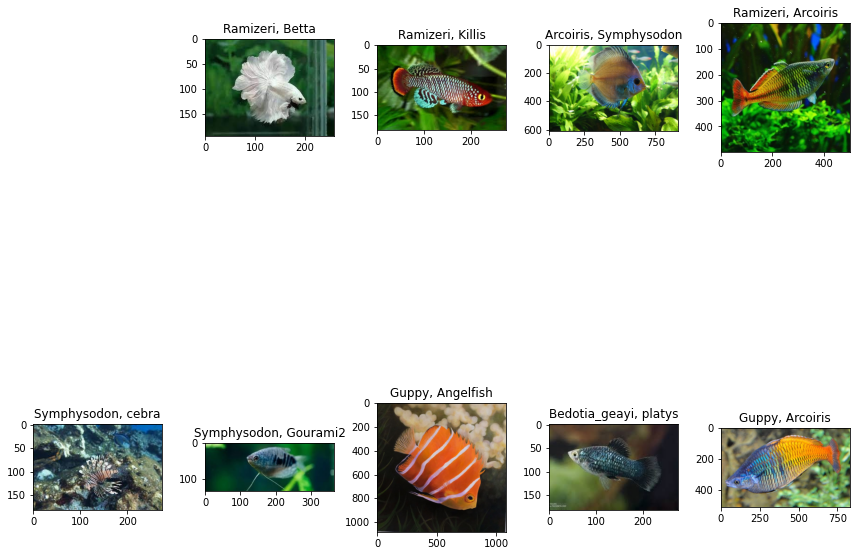

In [199]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_vgg19[i] == preds_vgg19[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {filename.split('.')[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_vgg19')
plt.show()

## A new convolutional network since this shit is clearly not working

In [180]:
from tensorflow import keras

In [185]:
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (IM_SIZE, IM_SIZE, 3)), 
    layers.MaxPooling2D(pool_size = (2,2)), 
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)), 
    layers.Conv2D(256, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(), 
    layers.Dense(128, activation = 'relu'),
    layers.Dense(15, activation = 'softmax')])

model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [186]:
model.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 20, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
25/25 [==============================] - 7s 219ms/step - loss: 0.3180 - accuracy: 0.0644 - val_loss: 0.2656 - val_accuracy: 0.0661
Epoch 2/50
25/25 [==============================] - 6s 227ms/step - loss: 0.2492 - accuracy: 0.0707 - val_loss: 0.2497 - val_accuracy: 0.0331
Epoch 3/50
25/25 [==============================] - 6s 248ms/step - loss: 0.2449 - accuracy: 0.1019 - val_loss: 0.2399 - val_accuracy: 0.0992
Epoch 4/50
25/25 [==============================] - 6s 245ms/step - loss: 0.2383 - accuracy: 0.1331 - val_loss: 0.2327 - val_accuracy: 0.1653
Epoch 5/50
25/25 [==============================] - 6s 222ms/step - loss: 0.2295 - accuracy: 0.1746 - val_loss: 0.2289 - val_accuracy: 0.1818
Epoch 6/50
25/25 [==============================] - 6s 235ms/step - loss: 0.2267 - accuracy: 0.2037 - val_loss: 0.2286 - val_accuracy: 0.1818
Epoch 7/50
25/25 [==============================] - 6s 227ms/step - loss: 0.2297 - accuracy: 0.1580 - val_loss: 0.2181 - val_accuracy: 0.2231
Epoch 

In [187]:
preds = model.predict(X_test)

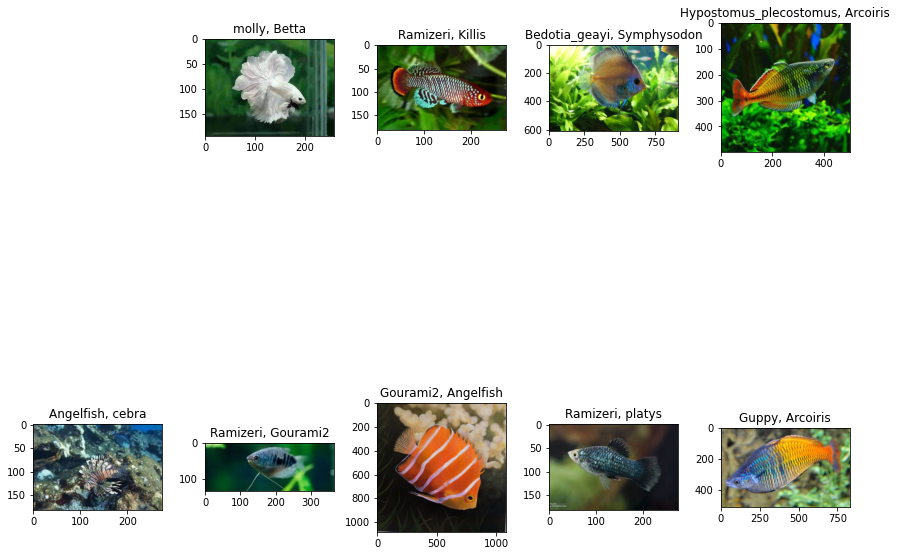

In [188]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds[i] == preds[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {filename.split('.')[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_vgg16')
plt.show()